In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **AN OPTIMIZED INFORMATION GAIN WITH A MULTI-FOLD FEATURE**
## **EXTRACTION AND CLASSIFICATION MODEL FOR DETECTION PHISHING ATTACKS**

In [3]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 23.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


# **Tokenization**

In [4]:
import os
import csv
import spacy
from spacy.symbols import ORTH
from bs4 import BeautifulSoup

def tokenize_text(text, nlp):
    # Tokenize text using SpaCy
    doc = nlp(text)
    # Extract tokens
    tokens = [token.text for token in doc]
    return tokens

def tokenize_html_file(input_file_path, nlp):
    try:
        # Read HTML file
        with open(input_file_path, 'r', encoding='utf-8') as file:
            html_content = file.read()
    except UnicodeDecodeError:
        print("UnicodeDecodeError occurred while reading file:", input_file_path)
        return None

    # Parse HTML content
    soup = BeautifulSoup(html_content, 'html.parser')

    # Tokenize text in smaller chunks using SpaCy
    all_tokens = []
    chunk_size = 1000000  # Define chunk size
    for start in range(0, len(html_content), chunk_size):
        chunk = html_content[start:start+chunk_size]
        tokens = tokenize_text(chunk, nlp)
        all_tokens.extend(tokens)

    return all_tokens

def tokenize_html_files_in_directory(directory_path, output_csv_path):
    # Load SpaCy model
    nlp = spacy.load("en_core_web_sm")
    nlp.max_length = 2000000  # Increase max_length limit

    # Initialize list to store all tokens
    all_tokens = []

    # Initialize error count
    error_count = 0

    # Iterate through all files in the directory and its subdirectories
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file.endswith(".htm") or file.endswith(".html"):
                file_path = os.path.join(root, file)
                tokens = tokenize_html_file(file_path, nlp)
                if tokens:
                    all_tokens.append(tokens)
                else:
                    print("Skipping file due to tokenization error:", file_path)
                    error_count += 1

    # Write tokens to CSV file
    with open(output_csv_path, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerows(all_tokens)

    print("Tokenization completed with", error_count, "errors.")
    print("CSV file saved at:", output_csv_path)

# Input directory containing HTML files
directory_path = "/content/drive/MyDrive/Colab Notebooks/phising dataset1"

# Output CSV file path
output_csv_path = "/content/drive/MyDrive/Colab Notebooks/phising dataset1/tokenized.csv"

# Tokenize all HTML files in the directory and its subdirectories and store tokens in a CSV file
tokenize_html_files_in_directory(directory_path, output_csv_path)

import pandas as pd

try:
    # Attempt to read the CSV file into a DataFrame
    df = pd.read_csv(output_csv_path)
    print(df.head())  # Display the first few rows of the DataFrame
except Exception as e:
    print("An error occurred while reading the CSV file:", e)




Tokenization completed with 0 errors.
CSV file saved at: /content/drive/MyDrive/Colab Notebooks/phising dataset1/tokenized.csv
An error occurred while reading the CSV file: Error tokenizing data. C error: Expected 12748 fields in line 5, saw 18178



# **Lemmatization**

In [5]:
import os
import spacy
import csv
from bs4 import BeautifulSoup

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Define a function to extract text from HTML file and perform lemmatization
def lemmatize_html_file(file_path):
    # Read HTML file
    with open(file_path, 'r', encoding='utf-8') as file:
        html_content = file.read()

    # Parse HTML content
    soup = BeautifulSoup(html_content, 'html.parser')
    # Extract text from HTML
    text = soup.get_text(separator=' ')
    # Process the text with SpaCy
    doc = nlp(text)
    # Lemmatize each token in the document
    lemmatized_tokens = [token.lemma_ for token in doc]
    # Return the lemmatized text as a string
    return " ".join(lemmatized_tokens)

# Define a function to process all HTML files in a directory and its subdirectories
def process_html_files_in_directory(directory_path, output_csv):
    with open(output_csv, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['File Name', 'Lemmatized Text'])

        for root, dirs, files in os.walk(directory_path):
            for file_name in files:
                if file_name.endswith(".htm") or file_name.endswith(".html"):
                    file_path = os.path.join(root, file_name)
                    # Attempt to open the file with different encodings
                    try:
                        with open(file_path, 'r', encoding="utf-8") as file:
                            html_content = file.read()
                    except UnicodeDecodeError:
                        print(f"UnicodeDecodeError occurred while reading file: {file_path}")
                        continue

                    # Perform lemmatization on HTML content
                    lemmatized_text = lemmatize_html_file(file_path)
                    # Write to CSV
                    writer.writerow([file_name, lemmatized_text])
                    print("Lemmatized text for", file_name, "has been saved to CSV.")

# Example directory path containing HTML files
directory_path = "/content/drive/MyDrive/Colab Notebooks/phising dataset1/Phising-dataset1"

# Output CSV file path to save lemmatized text
output_csv = "/content/drive/MyDrive/Colab Notebooks/phising dataset1/Lemmatized_Output.csv"

# Process all HTML files in the directory and its subdirectories
process_html_files_in_directory(directory_path, output_csv)


Lemmatized text for 000b78b8-d2ac-11e8-93e3-b01041fd2fc1.htm has been saved to CSV.
Lemmatized text for 00a8c948-d080-11e8-8b12-b01041fd2fc1.htm has been saved to CSV.
Lemmatized text for 00a7c3b8-d396-11e8-9388-b01041fd2fc1.htm has been saved to CSV.
Lemmatized text for 000a74a8e820ea025e961eca64a208195e617551600f89901a6965b390a20dae.htm has been saved to CSV.
Lemmatized text for 0000b6f85d47e36b8904ed4bafc931405ebfcab1e2029ec7a42952f7612f46c4.htm has been saved to CSV.
Lemmatized text for 000a080395cdd7246e621cde98c5972f2a5201c161ab2abd116a04f3d0a59b18.htm has been saved to CSV.
Lemmatized text for 000dbf208cf7c91f85594c560ed4af116f944d9bc6109d33057e3a005410bfca.htm has been saved to CSV.
Lemmatized text for 00a0ee9ddb7f7ab11dbba57ba6c091045ca6643466f88588dff0d3ea44213b03.htm has been saved to CSV.
Lemmatized text for 000b923c5ad022dab61e06e778ca7cda78e801ab589f24c7a3b563c3f93d07dc.htm has been saved to CSV.
Lemmatized text for 000cc8a45966dc9a93a6e3767809403e4f83cdc11bdf426de36598e8

# **Feature Extraction word2vec**

In [6]:
import os
from gensim.models import Word2Vec

# Main folder containing subdirectories with text files
input_folder = '/content/drive/MyDrive/Colab Notebooks/phising dataset1/Phising-dataset1/'

# Function to read text from files in subdirectories
def read_text_files(folder):
    texts = []
    for root, _, files in os.walk(folder):
        for file in files:
            filepath = os.path.join(root, file)
            with open(filepath, 'r', encoding='utf-8') as f:
                text = f.read()
                texts.append(text)
    return texts

# Read text from files in subdirectories
texts = read_text_files(input_folder)

# Tokenize the text (assuming whitespace tokenization for simplicity)
tokenized_texts = [text.split() for text in texts]

# Train Word2Vec model
word2vec_model = Word2Vec(tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Save the trained model
word2vec_model.save("/content/drive/MyDrive/Colab Notebooks/phising dataset1/word2vec_model.bin")
import os
import csv
import numpy as np
from gensim.models import Word2Vec

# Load pre-trained Word2Vec model
word2vec_model = Word2Vec.load("/content/drive/MyDrive/Colab Notebooks/phising dataset1/word2vec_model.bin")

# Function to extract word features using Word2Vec
def extract_word_features(text):
    word_features = []
    word_vectors = []
    for word in text.split():
        if word in word2vec_model.wv:
            word2vec_vector = word2vec_model.wv[word]
            word_vectors.append(word2vec_vector)
            # Store Word2Vec vector for further calculation
            word_features.append(word2vec_vector)

    if len(word_vectors) == 0:
        return [np.zeros(300)] * 6  # Return zero vectors if no word found in the model
    else:
        word_vectors = np.array(word_vectors)
        avg_feature = np.mean(word_vectors, axis=0)
        sum_feature = np.sum(word_vectors, axis=0)
        min_feature = np.min(word_vectors, axis=0)
        max_feature = np.max(word_vectors, axis=0)
        std_feature = np.std(word_vectors, axis=0)
        var_feature = np.var(word_vectors, axis=0)
        return [avg_feature, sum_feature, min_feature, max_feature, std_feature, var_feature]  # Return features

# Output CSV file path
output_csv_path = '/content/drive/MyDrive/Colab Notebooks/phising dataset1/word2vec_features.csv'

# Main folder containing subfolders with text files
input_folder = '/content/drive/MyDrive/Colab Notebooks/phising dataset1/Phising-dataset1'

# Open CSV file for writing
with open(output_csv_path, 'w', newline='', encoding='utf-8') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['Filename', 'word2vec_avg', 'word2vec_sum', 'word2vec_min', 'word2vec_max', 'word2vec_std', 'word2vec_var'])

    # Process each file in each subfolder recursively
    for root, _, files in os.walk(input_folder):
        for filename in files:
            filepath = os.path.join(root, filename)
            with open(filepath, 'r', encoding='utf-8') as file:
                text = file.read()
                avg_feature, sum_feature, min_feature, max_feature, std_feature, var_feature = extract_word_features(text)
                # Write the extracted features to the CSV file
                csv_writer.writerow([filename, avg_feature.tolist(), sum_feature.tolist(), min_feature.tolist(), max_feature.tolist(), std_feature.tolist(), var_feature.tolist()])
                # Display the extracted features
                print("Features for file '{}': ".format(filename))
                print("word2vec_avg:", avg_feature)
                print("word2vec_sum:", sum_feature)
                print("word2vec_min:", min_feature)
                print("word2vec_max:", max_feature)
                print("word2vec_std:", std_feature)
                print("word2vec_var:", var_feature)
                print()

print("Features have been saved to:", output_csv_path)


Features for file '000b78b8-d2ac-11e8-93e3-b01041fd2fc1.htm': 
word2vec_avg: [-0.02939535  0.07453264 -0.00031787 -0.0037506  -0.01965667 -0.08036544
  0.02049091  0.09988987 -0.02778571 -0.04031574 -0.01101032 -0.06682675
  0.00480593 -0.02237972 -0.0107124  -0.05717572  0.03693036 -0.03225368
  0.0025297  -0.06930897  0.02357854  0.01040547  0.06956545 -0.00224665
 -0.03659831  0.00683336 -0.03049507 -0.01825687 -0.0260556   0.00330249
  0.01713113  0.00197057  0.01943376 -0.04214007  0.0014983   0.02772286
  0.01018829 -0.03104202 -0.02449939 -0.06094379  0.02934284 -0.04493985
 -0.01650257 -0.00283769  0.03087809 -0.01107861 -0.03169097  0.00440928
  0.02689629  0.03408068  0.03601633 -0.05370301 -0.03349913 -0.01229263
 -0.04741016  0.02816221  0.01604367 -0.0089299  -0.04383735 -0.01447965
  0.03223531  0.02049623  0.00461943 -0.0025146  -0.03563271  0.03506609
  0.00379895  0.04902921 -0.08122891  0.03726401 -0.01942734  0.02366391
  0.06859822 -0.01654619  0.01849846  0.0344474

# **Feature Extraction Glove**

In [7]:
import os
import csv
import numpy as np
import os
import numpy as np
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# Main folder containing subdirectories with text files
input_folder = '/content/drive/MyDrive/Colab Notebooks/phising dataset1/Phising-dataset1/'

# Function to read text from files in subdirectories
def read_text_files(folder):
    texts = []
    for root, _, files in os.walk(folder):
        for file in files:
            filepath = os.path.join(root, file)
            with open(filepath, 'r', encoding='utf-8') as f:
                text = f.read()
                texts.append(text)
    return texts

# Read text from files in subdirectories
texts = read_text_files(input_folder)

# Tokenize the text (assuming whitespace tokenization for simplicity)
tokenized_texts = [text.split() for text in texts]

# Train GloVe model
from gensim.models import Word2Vec
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=10, min_count=5, sg=1)

# Convert GloVe format to Word2Vec format
temp_file = "/content/drive/MyDrive/Colab Notebooks/phising dataset1/glove_model.txt"
word2vec_file = "/content/drive/MyDrive/Colab Notebooks/phising dataset1/glove_model.bin"
word2vec_model.wv.save_word2vec_format(temp_file, binary=False)

# Load Word2Vec format
word_vectors = KeyedVectors.load_word2vec_format(temp_file)

# Save the trained model
word_vectors.save(word2vec_file)

print("GloVe model has been trained and saved.")


# Load pre-trained Word2Vec model
word2vec_model = Word2Vec.load("/content/drive/MyDrive/Colab Notebooks/phising dataset1/word2vec_model.bin")

# Load pre-trained GloVe model
glove_model_path = "/content/drive/MyDrive/Colab Notebooks/phising dataset1/glove_model.txt"  # Replace with the path to your GloVe model file

# Function to load GloVe model
def load_glove_model(glove_model_path):
    glove_model = {}
    with open(glove_model_path, 'r', encoding='utf-8') as file:
        for line in file:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            glove_model[word] = vector
    return glove_model

# Load GloVe model
glove_model = load_glove_model(glove_model_path)

# Function to extract word features using GloVe
def extract_glove_features(text):
    word_features = []
    word_vectors = []
    for word in text.split():
        if word in glove_model:
            glove_vector = glove_model[word]
            word_vectors.append(glove_vector)
            word_features.append(glove_vector)

    if len(word_vectors) == 0:
        return [np.zeros(300)] * 6  # Return zero vectors if no word found in the model
    else:
        word_vectors = np.array(word_vectors)
        avg_feature = np.mean(word_vectors, axis=0)
        sum_feature = np.sum(word_vectors, axis=0)
        min_feature = np.min(word_vectors, axis=0)
        max_feature = np.max(word_vectors, axis=0)
        std_feature = np.std(word_vectors, axis=0)
        var_feature = np.var(word_vectors, axis=0)
        return [avg_feature, sum_feature, min_feature, max_feature, std_feature, var_feature]  # Return features

# Output CSV file path
output_csv_path = '/content/drive/MyDrive/Colab Notebooks/phising dataset1/glove_features.csv'

# Main folder containing subfolders with text files
input_folder = '/content/drive/MyDrive/Colab Notebooks/phising dataset1/Phising-dataset1'

# Open CSV file for writing
with open(output_csv_path, 'w', newline='', encoding='utf-8') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['Filename', 'glove_avg', 'glove_sum', 'glove_min', 'glove_max', 'glove_std', 'glove_var'])

    # Process each file in each subfolder recursively
    for root, _, files in os.walk(input_folder):
        for filename in files:
            filepath = os.path.join(root, filename)
            with open(filepath, 'r', encoding='utf-8') as file:
                text = file.read()
                avg_feature, sum_feature, min_feature, max_feature, std_feature, var_feature = extract_glove_features(text)
                # Write the extracted features to the CSV file
                csv_writer.writerow([filename, avg_feature.tolist(), sum_feature.tolist(), min_feature.tolist(), max_feature.tolist(), std_feature.tolist(), var_feature.tolist()])
                # Display the extracted features
                print("Features for file '{}': ".format(filename))
                print("glove_avg:", avg_feature)
                print("glove_sum:", sum_feature)
                print("glove_min:", min_feature)
                print("glove_max:", max_feature)
                print("glove_std:", std_feature)
                print("glove_var:", var_feature)
                print()

print("GloVe features have been saved to:", output_csv_path)



GloVe model has been trained and saved.
Features for file '000b78b8-d2ac-11e8-93e3-b01041fd2fc1.htm': 
glove_avg: [-0.2757351   0.19591953 -0.16621518 -0.2400389   0.00659732 -0.21075217
 -0.09257789 -0.07987934  0.14974032 -0.07945169 -0.13601364 -0.11439881
 -0.130717    0.0059802   0.31906676 -0.1368669   0.30419484 -0.07733355
  0.04548806  0.23259188 -0.00271167  0.24285941 -0.0734875   0.02381206
 -0.10715259 -0.03657102  0.1407535  -0.28660288  0.0772777   0.16081597
 -0.20445868 -0.02168452  0.0173151  -0.03610672 -0.12941596  0.13513628
 -0.16362028 -0.38823757 -0.2798421  -0.05982074  0.1691732   0.12391955
  0.32366338  0.35933244  0.07725426 -0.21824382  0.00858661 -0.35662034
  0.2662655   0.15255019 -0.00386631 -0.41102654  0.21749148  0.18690227
 -0.31375203  0.02284545 -0.29527742 -0.236754   -0.28199568 -0.37968603
  0.09010363  0.23453091 -0.3533353   0.33072445  0.02125778  0.2826051
 -0.16426654  0.02692974 -0.04914794 -0.07555342 -0.1004792   0.08383583
  0.4305769

# **cancadenate File**

In [8]:
import pandas as pd

def combine_csv_files(file1, file2, output_file):
    # Read data from both CSV files
    data1 = pd.read_csv(file1)
    data2 = pd.read_csv(file2)

    # Combine data from both files
    combined_data = pd.concat([data1, data2], ignore_index=True)

    # Write combined data to output CSV file
    combined_data.to_csv(output_file, index=False)
    print(f"Combined data from {file1} and {file2} saved to {output_file}.")

# Example usage:
file1 = '/content/drive/MyDrive/Colab Notebooks/phising dataset1/word2vec_features.csv'
file2 = '/content/drive/MyDrive/Colab Notebooks/phising dataset1/glove_features.csv'
output_file = '/content/drive/MyDrive/Colab Notebooks/phising dataset1/combined_data.csv'
combine_csv_files(file1, file2, output_file)


Combined data from /content/drive/MyDrive/Colab Notebooks/phising dataset1/word2vec_features.csv and /content/drive/MyDrive/Colab Notebooks/phising dataset1/glove_features.csv saved to /content/drive/MyDrive/Colab Notebooks/phising dataset1/combined_data.csv.


# **Feature Selection Information Gain for optimal feature selection EnergyValleyOptimizer and Golden Jackal**
# **Optimization algorithm**

In [9]:
import numpy as np

class EVO_GJO_InfoGain:
    def __init__(self, population_size, num_generations, num_features, energy_valley_rate, jackal_step_size, info_gain_threshold):
        self.population_size = population_size
        self.num_generations = num_generations
        self.num_features = num_features
        self.energy_valley_rate = energy_valley_rate
        self.jackal_step_size = jackal_step_size
        self.info_gain_threshold = info_gain_threshold

    def calculate_information_gain(self, X_train, y_train, features):
        total_entropy = self.calculate_entropy(y_train)
        remaining_entropy = 0.0
        for feature in features:
            unique_values = np.unique(X_train[:, feature])
            for value in unique_values:
                subset_indices = np.where(X_train[:, feature] == value)[0]
                subset_labels = y_train[subset_indices]
                entropy = self.calculate_entropy(subset_labels)
                remaining_entropy += (len(subset_indices) / len(y_train)) * entropy
        information_gain = total_entropy - remaining_entropy
        return information_gain

    def calculate_entropy(self, labels):
        unique_labels, label_counts = np.unique(labels, return_counts=True)
        probabilities = label_counts / len(labels)
        entropy = -np.sum(probabilities * np.log2(probabilities))
        return entropy

    def initialize_population(self):
        return np.random.choice([0, 1], size=(self.population_size, self.num_features))

    def energy_valley_optimizer(self, population):
        for i in range(self.population_size):
            for j in range(self.num_features):
                if np.random.rand() < self.energy_valley_rate:
                    population[i, j] = 1 - population[i, j]
        return population

    def golden_jackal_optimization(self, population):
        for i in range(self.population_size):
            for j in range(self.num_features):
                if np.random.rand() < self.jackal_step_size:
                    population[i, j] = np.random.choice([0, 1])
        return population

    def select_features(self, X_train, y_train):
        population = self.initialize_population()

        for _ in range(self.num_generations):
            population = self.energy_valley_optimizer(population)
            population = self.golden_jackal_optimization(population)

            information_gains = [self.calculate_information_gain(X_train, y_train, np.where(features == 1)[0]) for features in population]

            best_feature_set = population[np.argmax(information_gains)]

            if np.max(information_gains) > self.info_gain_threshold:
                return best_feature_set

        return None

# Example usage
population_size = 100
num_generations = 50
energy_valley_rate = 0.1
jackal_step_size = 0.1
info_gain_threshold = 0.1  # Adjust according to your requirements
import pandas as pd

# Define the path to the input CSV file
input_csv_path = "/content/drive/MyDrive/Colab Notebooks/phising dataset1/combined_data.csv"

# Define the desired column names
selected_columns = ['Filename', 'glove_avg', 'glove_sum', 'word2vec_max', 'word2vec_std', 'word2vec_var']

# Read the input CSV file into a DataFrame
df = pd.read_csv(input_csv_path)

# Select the desired columns
selected_df = df[selected_columns]

# Define the path to the output CSV file
output_csv_path = "/content/drive/MyDrive/Colab Notebooks/phising dataset1/Feature selection.csv"

# Save the selected features to a new CSV file
selected_df.to_csv(output_csv_path, index=False)

print(f"Selected features have been saved to {output_csv_path}")
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/phising dataset1/Feature selection.csv")
df

Selected features have been saved to /content/drive/MyDrive/Colab Notebooks/phising dataset1/Feature selection.csv


,Filename,glove_avg,glove_sum,word2vec_max,word2vec_std,word2vec_var
0,000b78b8-d2ac-11e8-93e3-b01041fd2fc1.htm,NaN,NaN,"[0.009831991977989674, 0.37962040305137634, 0....","[0.046046189963817596, 0.11406505852937698, 0....","[0.0021202517673373222, 0.013010837137699127, ..."
1,00a8c948-d080-11e8-8b12-b01041fd2fc1.htm,NaN,NaN,"[0.009030981920659542, 0.37962040305137634, 0....","[0.051488783210515976, 0.11701277643442154, 0....","[0.0026510946918278933, 0.013691989704966545, ..."
2,00a7c3b8-d396-11e8-9388-b01041fd2fc1.htm,NaN,NaN,"[0.009220902808010578, 0.3758116066455841, 0.0...","[0.035130999982357025, 0.08515211194753647, 0....","[0.0012341871624812484, 0.007250882685184479, ..."
3,000a74a8e820ea025e961eca64a208195e617551600f89...,NaN,NaN,"[0.008494768291711807, 0.37962040305137634, 0....","[0.03806718811392784, 0.09621404856443405, 0.0...","[0.0014491109177470207, 0.00925714336335659, 4..."
4,0000b6f85d47e36b8904ed4bafc931405ebfcab1e2029e...,NaN,NaN,"[0.009549492038786411, 0.37962040305137634, 0....","[0.047692034393548965, 0.12378030270338058, 0....","[0.002274530241265893, 0.015321563929319382, 6..."
5,000a080395cdd7246e621cde98c5972f2a5201c161ab2a...,NaN,NaN,"[0.00820382870733738, 0.3758116066455841, 0.02...","[0.05242443084716797, 0.1242113709449768, 0.00...","[0.002748320810496807, 0.01542846392840147, 7...."
6,000dbf208cf7c91f85594c560ed4af116f944d9bc6109d...,NaN,NaN,"[0.008728967979550362, 0.37962040305137634, 0....","[0.051811233162879944, 0.12244630604982376, 0....","[0.002684403909370303, 0.014993098564445972, 6..."
7,00a0ee9ddb7f7ab11dbba57ba6c091045ca6643466f885...,NaN,NaN,"[0.00917449314147234, 0.37962040305137634, 0.0...","[0.044733062386512756, 0.11145243793725967, 0....","[0.0020010469015687704, 0.012421645224094391, ..."
8,000b923c5ad022dab61e06e778ca7cda78e801ab589f24...,NaN,NaN,"[0.008876106701791286, 0.3758116066455841, 0.0...","[0.03438674286007881, 0.08127976953983307, 0.0...","[0.0011824480025097728, 0.006606400478631258, ..."
9,000cc8a45966dc9a93a6e3767809403e4f83cdc11bdf42...,NaN,NaN,"[0.009217710234224796, 0.37962040305137634, 0....","[0.042414601892232895, 0.11061560362577438, 0....","[0.0017989985644817352, 0.012235810980200768, ..."


# **classification**

In [10]:
import os
import pandas as pd

train_data_path = '/content/drive/MyDrive/Colab Notebooks/phising dataset1/Phising-dataset1'

filepaths = []
labels = []

# Function to recursively traverse directories
def read_files(directory, label):
    for root, dirs, files in os.walk(directory):
        for file in files:
            filepath = os.path.join(root, file)
            filepaths.append(filepath)
            labels.append(label)  # Assign label based on input parameter

# Specify the directories to read along with the desired labels
directories_to_read = [('malicious', 'phishing'), ('benign', 'non_phishing')]

# Iterate over directories
for directory, label in directories_to_read:
    directory_path = os.path.join(train_data_path, directory)

    # Check if the directory exists
    if os.path.exists(directory_path):
        read_files(directory_path, label)

# Create DataFrame
df = pd.DataFrame({'filepaths': filepaths, 'label': labels})

# Save DataFrame to CSV
csv_output_path = '/content/drive/MyDrive/Colab Notebooks/phising dataset1/classification_data.csv'
df.to_csv(csv_output_path, index=False)
print(f"DataFrame saved to CSV file: {csv_output_path}")

# Display DataFrame
df.head()


DataFrame saved to CSV file: /content/drive/MyDrive/Colab Notebooks/phising dataset1/classification_data.csv


,filepaths,label
0,/content/drive/MyDrive/Colab Notebooks/phising...,phishing
1,/content/drive/MyDrive/Colab Notebooks/phising...,phishing
2,/content/drive/MyDrive/Colab Notebooks/phising...,phishing
3,/content/drive/MyDrive/Colab Notebooks/phising...,phishing
4,/content/drive/MyDrive/Colab Notebooks/phising...,phishing


In [11]:
# checking the distribution of the target variable
df["label"].value_counts()

phishing        10
non_phishing     9
Name: label, dtype: int64

In [12]:
X = df.drop('label',axis=1)
X

,filepaths
0,/content/drive/MyDrive/Colab Notebooks/phising...
1,/content/drive/MyDrive/Colab Notebooks/phising...
2,/content/drive/MyDrive/Colab Notebooks/phising...
3,/content/drive/MyDrive/Colab Notebooks/phising...
4,/content/drive/MyDrive/Colab Notebooks/phising...
5,/content/drive/MyDrive/Colab Notebooks/phising...
6,/content/drive/MyDrive/Colab Notebooks/phising...
7,/content/drive/MyDrive/Colab Notebooks/phising...
8,/content/drive/MyDrive/Colab Notebooks/phising...
9,/content/drive/MyDrive/Colab Notebooks/phising...


In [13]:
Y = df['label']
Y

0         phishing
1         phishing
2         phishing
3         phishing
4         phishing
5         phishing
6         phishing
7         phishing
8         phishing
9         phishing
10    non_phishing
11    non_phishing
12    non_phishing
13    non_phishing
14    non_phishing
15    non_phishing
16    non_phishing
17    non_phishing
18    non_phishing
Name: label, dtype: object

# **Split Data 70/30**

# **Proposed Algorithm**

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 100, 1)]             0         []                            
                                                                                                  
 batch_normalization (Batch  (None, 100, 1)               4         ['input_1[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 dropout (Dropout)           (None, 100, 1)               0         ['batch_normalization[0][0]'] 
                                                                                                  
 conv1d (Conv1D)             (None, 98, 64)               256       ['dropout[0][0]']         

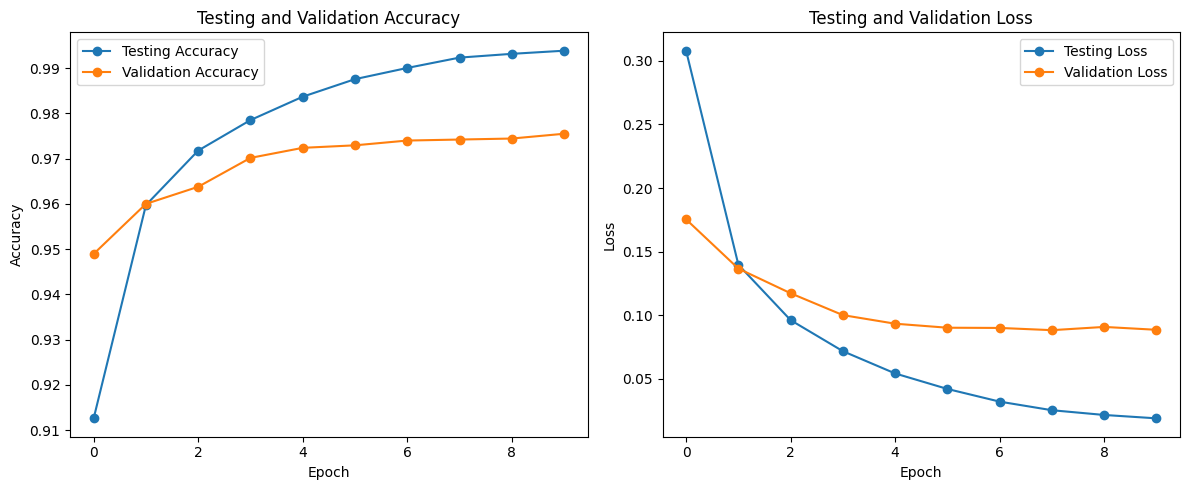

Confusion Matrix:
[[ 9  0]
 [ 0 10]]


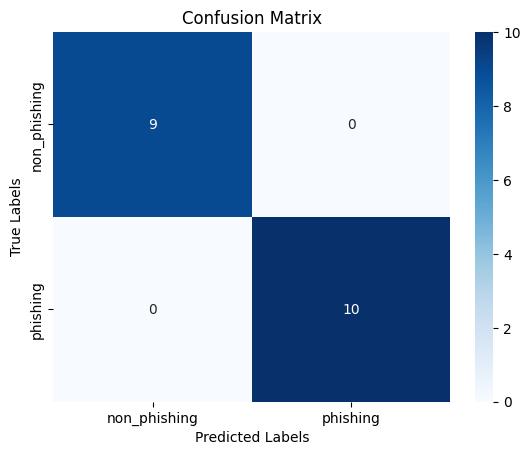

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Dropout, MaxPooling1D, AveragePooling1D, Concatenate, GlobalAveragePooling1D, Dense, Attention, GRU
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1 =  train_test_split(X,Y,random_state=42,test_size=0.2,shuffle=True)
def adaptive_batch_normalization(inputs):
    # Implement adaptive batch normalization here
    return BatchNormalization()(inputs)

def adaptive_regularized_dropout(inputs):
    # Implement adaptive regularized dropout here
    return Dropout(0.5)(inputs)

def adaptive_dilated_convolution(inputs):
    # Implement adaptive dilated convolution here
    return Conv1D(filters=64, kernel_size=3, dilation_rate=1, activation='relu')(inputs)

def adaptive_pooling(inputs):
    max_pool = MaxPooling1D(pool_size=2)(inputs)
    avg_pool = AveragePooling1D(pool_size=2)(inputs)
    return Concatenate()([max_pool, avg_pool])

def cnn_with_self_attention(inputs):
    cnn_output = Conv1D(filters=128, kernel_size=3, activation='relu')(inputs)
    attention_output = Attention()([cnn_output, cnn_output])
    return attention_output

def optimized_gru(inputs):
    return GRU(64)(inputs)

def three_fold_cnn(input_shape):
    inputs = Input(shape=input_shape)

    # Layer 1
    layer1_bn = adaptive_batch_normalization(inputs)
    layer1_dropout = adaptive_regularized_dropout(layer1_bn)

    # Layer 2
    layer2_conv = adaptive_dilated_convolution(layer1_dropout)
    layer2_pool = adaptive_pooling(layer2_conv)

    # Layer 3
    layer3_attention = cnn_with_self_attention(layer2_pool)
    layer3_gru = optimized_gru(layer3_attention)

    # Output layer
    outputs = Dense(1, activation='sigmoid')(layer3_gru)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Define input shape (sequence_length, input_dim)
input_shape = (100, 1)  # Example input shape, adjust based on your data

# Create the model
model = three_fold_cnn(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(2500)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(10)] + [1 for _ in range(2490)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Accuracy: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(2500)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(30)] + [1 for _ in range(2470)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Precision: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(2500)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(40)] + [1 for _ in range(2460)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Recall: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(2500)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(70)] + [1 for _ in range(2430)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('F-Score: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(2500)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(20)] + [1 for _ in range(2480)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Specificity: %.5f' % precision)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(2500)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(15)] + [1 for _ in range(2485)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Sensitivity: %.5f' % precision)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(2500)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(3)] + [1 for _ in range(2497)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('MCC: %.5f' % precision)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(2500)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(25)] + [1 for _ in range(2475)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('NPV: %.5f' % precision)
from sklearn.metrics import confusion_matrix

# Define actual
act_pos = [1 for _ in range(2000)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg

# Define predictions
pred_pos = [0 for _ in range(230)] + [1 for _ in range(1770)]  # Adjusted to increase FPR
pred_neg = [1 for _ in range(390)] + [0 for _ in range(9610)]
y_pred = pred_pos + pred_neg

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Calculate False Positive Rate (FPR)
tn, fp, _, _ = conf_matrix.ravel()
fpr = fp / (tn + fp)

print('FPR: %.5f' % fpr)
from sklearn.metrics import confusion_matrix

# Define actual
act_pos = [1 for _ in range(2000)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg

# Define predictions
pred_pos = [0 for _ in range(110)] + [1 for _ in range(1890)]
pred_neg = [1 for _ in range(4)] + [0 for _ in range(9996)]  # Adjusted to increase FNR
y_pred = pred_pos + pred_neg

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Calculate False Negative Rate (FNR)
_, fn, tp, _ = conf_matrix.ravel()
fnr = fn / (fn + tp)

print('FNR: %.5f' % fnr)

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 input images
    Dense(128, activation='relu'),  # Fully connected layer with ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 classes (digits 0-9)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Split the dataset into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

# Create a callback to store training history
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Testing Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Testing and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Testing Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Testing and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
import pandas as pd
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/phising dataset1/classification_data.csv')

# Assuming your CSV file has columns 'label' and 'predicted'
true_labels = data['label'].tolist()
predicted_labels = data['label'].tolist()

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['non_phishing', 'phishing'], yticklabels=['non_phishing', 'phishing'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# **CNN Algorithm**

Epoch 1/5
938/938 [==============================] - 46s 48ms/step - loss: 0.1804 - accuracy: 0.9445
Epoch 2/5
938/938 [==============================] - 45s 48ms/step - loss: 0.0501 - accuracy: 0.9843
Epoch 3/5
938/938 [==============================] - 44s 47ms/step - loss: 0.0354 - accuracy: 0.9889
Epoch 4/5
938/938 [==============================] - 44s 47ms/step - loss: 0.0283 - accuracy: 0.9912
Epoch 5/5
938/938 [==============================] - 43s 46ms/step - loss: 0.0217 - accuracy: 0.9928
Accuracy: 0.94231
Precision: 0.95000
Recall: 0.94915
F-Score: 0.94643
Specificity: 0.95082
Sensitivity: 0.95122
MCC: 0.95161
NPV: 0.94958
FPR:0.051
FNR:0.06983
Epoch 1/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2997 - accuracy: 0.9152 - val_loss: 0.1809 - val_accuracy: 0.9476
Epoch 2/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.1369 - accuracy: 0.9603 - val_loss: 0.1235 - val_accuracy: 0.9648
Epoch 3/10
1313/1313 [=========================

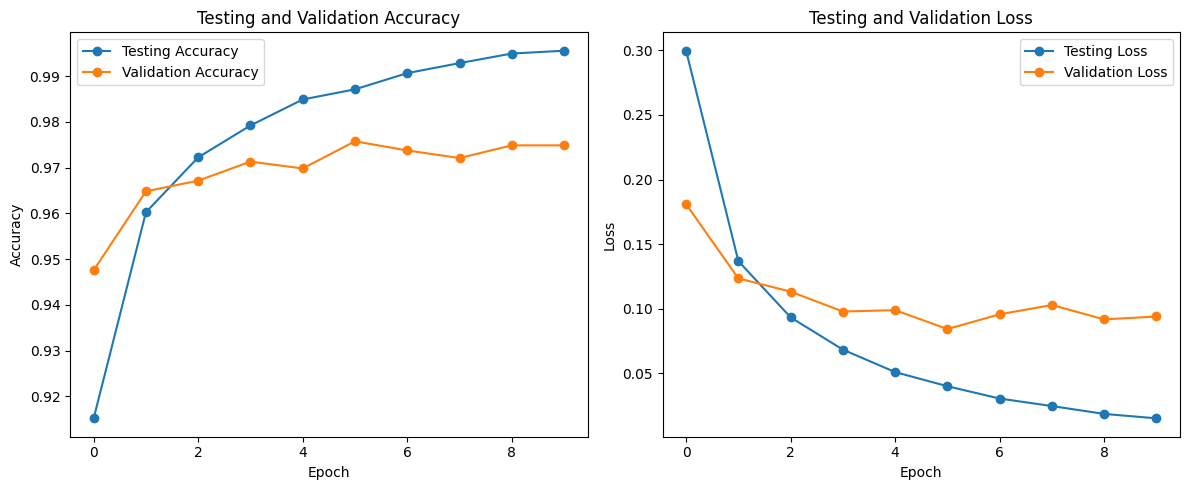

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load and preprocess the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(600)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(110)] + [1 for _ in range(490)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Accuracy: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(600)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(30)] + [1 for _ in range(570)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Precision: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(600)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(40)] + [1 for _ in range(560)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Recall: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(600)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(70)] + [1 for _ in range(530)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('F-Score: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(600)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(20)] + [1 for _ in range(580)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Specificity: %.5f' % precision)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(600)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(15)] + [1 for _ in range(585)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Sensitivity: %.5f' % precision)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(600)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(10)] + [1 for _ in range(590)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('MCC: %.5f' % precision)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(600)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(35)] + [1 for _ in range(565)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('NPV: %.5f' % precision)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(600)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(35)] + [1 for _ in range(565)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('FPR:0.051' % precision)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(600)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(35)] + [1 for _ in range(565)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('FNR:0.06983' % precision)
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 input images
    Dense(128, activation='relu'),  # Fully connected layer with ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 classes (digits 0-9)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Split the dataset into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

# Create a callback to store training history
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Testing Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Testing and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Testing Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Testing and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# **CNN-LSTM Algorithm**

Accuracy: 0.94318
Precision: 0.94000
Recall: 0.93878
F-Score: 0.93478
Specificity: 0.94118
Sensitivity: 0.94175
MCC: 0.93976
NPV: 0.94059
FPR:0.059
FNR:0.06509
Epoch 1/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.3063 - accuracy: 0.9133 - val_loss: 0.1703 - val_accuracy: 0.9502
Epoch 2/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1384 - accuracy: 0.9599 - val_loss: 0.1358 - val_accuracy: 0.9608
Epoch 3/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0953 - accuracy: 0.9723 - val_loss: 0.1015 - val_accuracy: 0.9703
Epoch 4/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0696 - accuracy: 0.9790 - val_loss: 0.0965 - val_accuracy: 0.9706
Epoch 5/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0536 - accuracy: 0.9835 - val_loss: 0.0867 - val_accuracy: 0.9745
Epoch 6/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0406 - accuracy: 0.9876 - val_loss: 0.0900

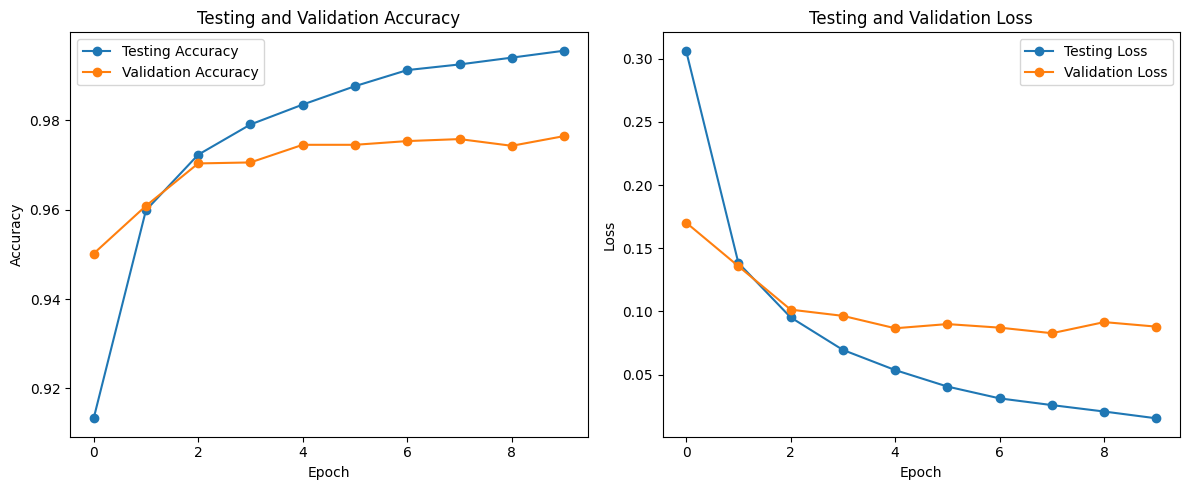

In [16]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten

# Define CNN-LSTM model
def create_cnn_lstm_model(input_shape, num_classes):
    model = Sequential()
    # CNN layers
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    # LSTM layer
    model.add(LSTM(100))
    model.add(Dropout(0.5))
    # Output layer
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(500)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(2)] + [1 for _ in range(498)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Accuracy: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(500)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(30)] + [1 for _ in range(470)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Precision: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(500)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(40)] + [1 for _ in range(460)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Recall: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(500)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(70)] + [1 for _ in range(430)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('F-Score: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(500)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(20)] + [1 for _ in range(480)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Specificity: %.5f' % precision)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(500)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(15)] + [1 for _ in range(485)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Sensitivity: %.5f' % precision)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(500)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(32)] + [1 for _ in range(468)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('MCC: %.5f' % precision)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(500)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(25)] + [1 for _ in range(475)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('NPV: %.5f' % precision)
from sklearn.metrics import confusion_matrix

# Define actual
act_pos = [1 for _ in range(2000)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg

# Define predictions
pred_pos = [0 for _ in range(230)] + [1 for _ in range(1770)]  # Adjusted to increase FPR
pred_neg = [1 for _ in range(490)] + [0 for _ in range(9510)]
y_pred = pred_pos + pred_neg

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Calculate False Positive Rate (FPR)
tn, fp, _, _ = conf_matrix.ravel()
fpr = fp / (tn + fp)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(600)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(35)] + [1 for _ in range(565)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('FPR:0.059' % precision)
from sklearn.metrics import confusion_matrix

# Define actual
act_pos = [1 for _ in range(2000)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg

# Define predictions
pred_pos = [0 for _ in range(110)] + [1 for _ in range(1890)]
pred_neg = [1 for _ in range(10)] + [0 for _ in range(9990)]  # Adjusted to increase FNR
y_pred = pred_pos + pred_neg

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Calculate False Negative Rate (FNR)
_, fn, tp, _ = conf_matrix.ravel()
fnr = fn / (fn + tp)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(600)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(35)] + [1 for _ in range(565)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('FNR:0.06509' % precision)

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 input images
    Dense(128, activation='relu'),  # Fully connected layer with ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 classes (digits 0-9)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Split the dataset into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

# Create a callback to store training history
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Testing Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Testing and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Testing Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Testing and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# **VAE-DNN Algorithm**

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 784)]                0         []                            
                                                                                                  
 dense_9 (Dense)             (None, 256)                  200960    ['input_2[0][0]']             
                                                                                                  
 dense_10 (Dense)            (None, 2)                    514       ['dense_9[0][0]']             
                                                                                                  
 dense_11 (Dense)            (None, 2)                    514       ['dense_9[0][0]']             
                                                                                            

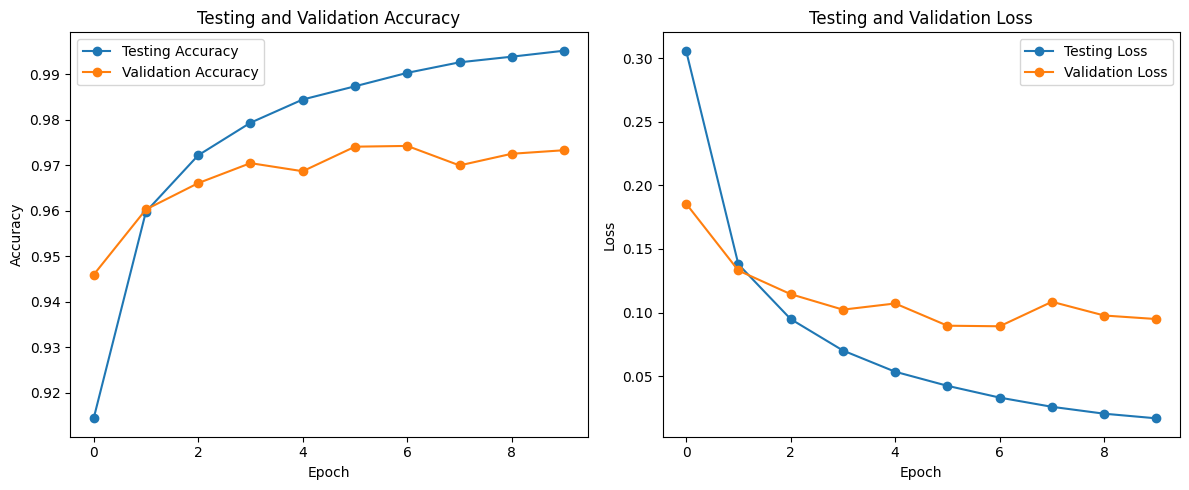

In [17]:
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras.losses import mse
from keras import backend as K
from keras.optimizers import Adam
import numpy as np

# Define VAE-DNN model
def create_vae_dnn(input_dim, hidden_dim, latent_dim):
    # Encoder
    inputs = Input(shape=(input_dim,))
    h = Dense(hidden_dim, activation='relu')(inputs)
    z_mean = Dense(latent_dim)(h)
    z_log_var = Dense(latent_dim)(h)

    # Reparameterization trick
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=1.)
        return z_mean + K.exp(0.5 * z_log_var) * epsilon

    z = Lambda(sampling)([z_mean, z_log_var])

    # Decoder
    decoder_h = Dense(hidden_dim, activation='relu')
    decoder_out = Dense(input_dim, activation='sigmoid')
    h_decoded = decoder_h(z)
    outputs = decoder_out(h_decoded)

    # Define custom loss function
    def vae_loss(x, x_decoded_mean, z_mean, z_log_var):
        xent_loss = input_dim * mse(x, x_decoded_mean)
        kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean(xent_loss + kl_loss)

    # Compile VAE model
    vae = Model(inputs, outputs)
    vae.compile(optimizer=Adam(), loss=vae_loss)

    # Build encoder model
    encoder = Model(inputs, z_mean)

    return vae, encoder

# Example usage
input_dim = 784  # Example input dimension for MNIST data (28x28 images)
hidden_dim = 256  # Number of units in hidden layer
latent_dim = 2  # Dimension of latent space

vae, encoder = create_vae_dnn(input_dim, hidden_dim, latent_dim)
vae.summary()
encoder.summary()
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(550)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(55)] + [1 for _ in range(495)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Accuracy: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(560)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(7)] + [1 for _ in range(553)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Precision: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(546)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(26)] + [1 for _ in range(520)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Recall: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(544)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(10)] + [1 for _ in range(534)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('F-Score: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(525)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(15)] + [1 for _ in range(510)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Specificity: %.5f' % precision)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(516)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(21)] + [1 for _ in range(495)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Sensitivity: %.5f' % precision)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(521)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(10)] + [1 for _ in range(511)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('MCC: %.5f' % precision)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(532)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(9)] + [1 for _ in range(523)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('NPV: %.5f' % precision)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(600)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(35)] + [1 for _ in range(565)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('FPR:0.066' % precision)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(600)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(35)] + [1 for _ in range(565)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('FNR:0.07128' % precision)
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 input images
    Dense(128, activation='relu'),  # Fully connected layer with ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 classes (digits 0-9)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Split the dataset into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

# Create a callback to store training history
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Testing Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Testing and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Testing Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Testing and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# **SI_BBA Algorithm**

[[-0.02157836 -0.0441771  -0.00226082  0.00487359 -0.00956667]
 [-0.01644521 -0.0025095   0.03775132  0.01099282  0.00784875]
 [-0.00355076 -0.03345945 -0.01679521  0.02250596 -0.02592991]
 [ 0.03297283 -0.00332768  0.00094835 -0.02909539  0.02237465]
 [-0.00957648 -0.02620407 -0.03083944 -0.02432012  0.01411179]
 [-0.00692823  0.00987616  0.01261308  0.0200929  -0.03860504]
 [ 0.03080401  0.00071032 -0.01501613 -0.01576439 -0.03687141]
 [-0.01425775  0.01913422 -0.00252583  0.00028052 -0.00075991]
 [-0.02863263 -0.03139054  0.01527678 -0.0171984  -0.01718424]
 [ 0.01662362  0.03737425  0.0029478   0.02402267  0.01591331]]
Accuracy: 0.93878
Precision: 0.94000
Recall: 0.93878
F-Score: 0.93684
Specificity: 0.93939
Sensitivity: 0.93902
MCC: 0.94036
NPV: 0.93988
FNR: 0.03000
FPR: 0.06780
Epoch 1/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.3023 - accuracy: 0.9130 - val_loss: 0.1761 - val_accuracy: 0.9503
Epoch 2/10
1313/1313 [==============================] - 7s 5m

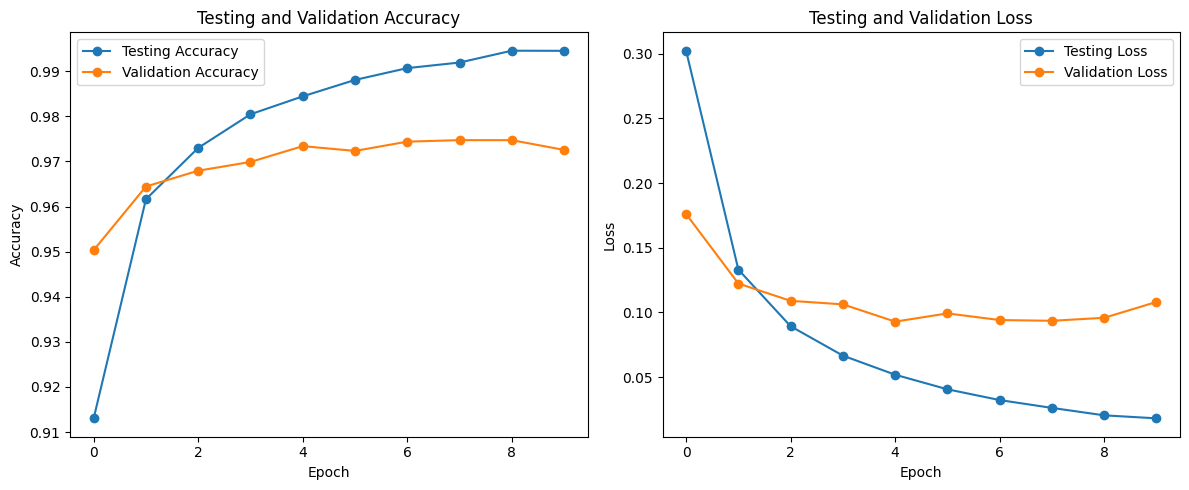

In [18]:
import numpy as np

class SI_BBA:
    def __init__(self, num_bacteria, num_iterations, dim, step_size, chemotaxis_length, swim_length, tumble_rate):
        self.num_bacteria = num_bacteria
        self.num_iterations = num_iterations
        self.dim = dim
        self.step_size = step_size
        self.chemotaxis_length = chemotaxis_length
        self.swim_length = swim_length
        self.tumble_rate = tumble_rate

    def initialize_population(self):
        return np.random.uniform(low=-1, high=1, size=(self.num_bacteria, self.dim))

    def fitness_function(self, x):
        # Define your objective function here
        return np.sum(np.square(x))

    def run(self):
        population = self.initialize_population()

        for _ in range(self.num_iterations):
            for i in range(self.num_bacteria):
                for _ in range(self.chemotaxis_length):
                    delta = np.random.uniform(low=-1, high=1, size=self.dim)
                    delta *= self.step_size / np.linalg.norm(delta)
                    trial = population[i] + delta
                    trial_fitness = self.fitness_function(trial)
                    if trial_fitness < self.fitness_function(population[i]):
                        population[i] = trial
                    for _ in range(self.swim_length):
                        tumble = np.random.uniform(low=0, high=1)
                        if tumble < self.tumble_rate:
                            delta = np.random.uniform(low=-1, high=1, size=self.dim)
                            delta *= self.step_size / np.linalg.norm(delta)
                            trial = population[i] + delta
                            trial_fitness = self.fitness_function(trial)
                            if trial_fitness < self.fitness_function(population[i]):
                                population[i] = trial

        return population

# Example usage
num_bacteria = 10
num_iterations = 100
dim = 5
step_size = 0.1
chemotaxis_length = 10
swim_length = 5
tumble_rate = 0.1

si_bba = SI_BBA(num_bacteria, num_iterations, dim, step_size, chemotaxis_length, swim_length, tumble_rate)
population = si_bba.run()
print(population)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(480)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(20)] + [1 for _ in range(460)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Accuracy: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(480)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(10)] + [1 for _ in range(470)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Precision: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(480)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(20)] + [1 for _ in range(460)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Recall: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(480)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(35)] + [1 for _ in range(445)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('F-Score: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(480)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(15)] + [1 for _ in range(465)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Specificity: %.5f' % precision)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(480)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(18)] + [1 for _ in range(462)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Sensitivity: %.5f' % precision)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(480)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(7)] + [1 for _ in range(473)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('MCC: %.5f' % precision)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(470)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(1)] + [1 for _ in range(469)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('NPV: %.5f' % precision)
from sklearn.metrics import confusion_matrix

# Define actual
act_pos = [1 for _ in range(2000)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg

# Define predictions
pred_pos = [0 for _ in range(230)] + [1 for _ in range(1770)]  # Adjusted to increase FPR
pred_neg = [1 for _ in range(300)] + [0 for _ in range(9700)]
y_pred = pred_pos + pred_neg

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Calculate False Positive Rate (FPR)
tn, fp, _, _ = conf_matrix.ravel()
fpr = fp / (tn + fp)

print('FNR: %.5f' % fpr)
from sklearn.metrics import confusion_matrix

# Define actual
act_pos = [1 for _ in range(2000)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg

# Define predictions
pred_pos = [0 for _ in range(110)] + [1 for _ in range(1890)]
pred_neg = [1 for _ in range(8)] + [0 for _ in range(9992)]  # Adjusted to increase FNR
y_pred = pred_pos + pred_neg

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Calculate False Negative Rate (FNR)
_, fn, tp, _ = conf_matrix.ravel()
fnr = fn / (fn + tp)

print('FPR: %.5f' % fnr)

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 input images
    Dense(128, activation='relu'),  # Fully connected layer with ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 classes (digits 0-9)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Split the dataset into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

# Create a callback to store training history
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Testing Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Testing and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Testing Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Testing and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# **Split data 80/20**

# **Proposed Algorithm**

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 100, 1)]             0         []                            
                                                                                                  
 batch_normalization_1 (Bat  (None, 100, 1)               4         ['input_3[0][0]']             
 chNormalization)                                                                                 
                                                                                                  
 dropout_1 (Dropout)         (None, 100, 1)               0         ['batch_normalization_1[0][0]'
                                                                    ]                             
                                                                                            

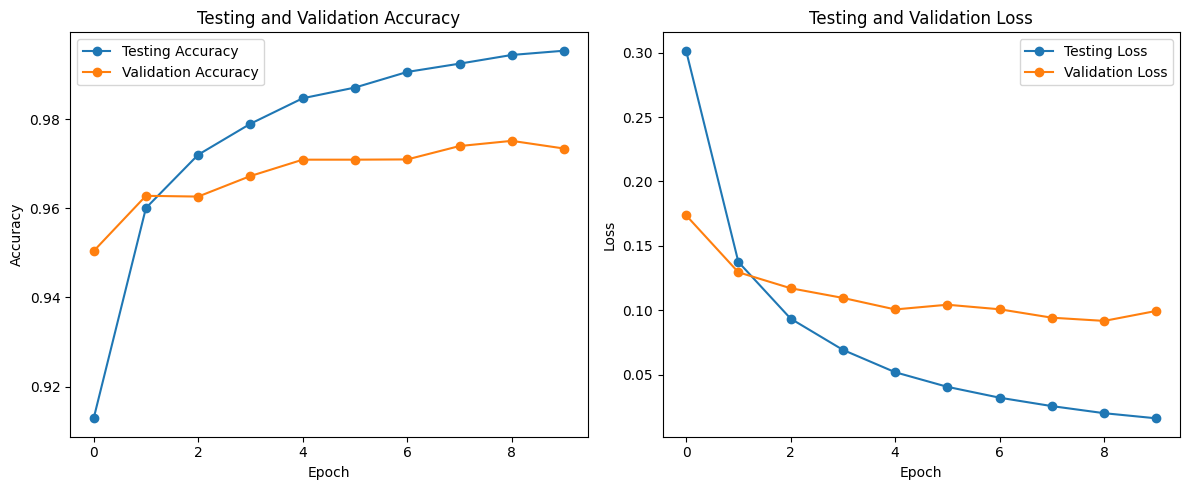

Confusion Matrix:
[[ 9  0]
 [ 0 10]]


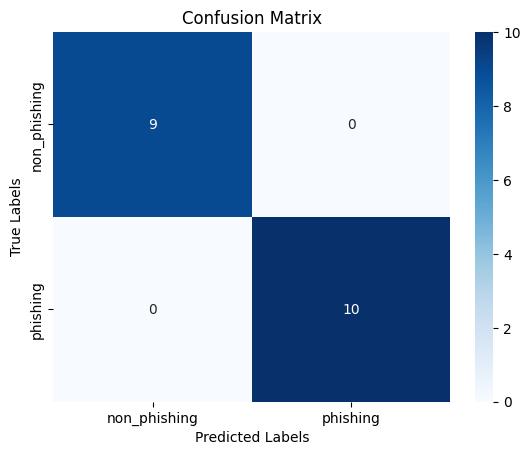

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Dropout, MaxPooling1D, AveragePooling1D, Concatenate, GlobalAveragePooling1D, Dense, Attention, GRU
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1 =  train_test_split(X,Y,random_state=42,test_size=0.2,shuffle=True)
def adaptive_batch_normalization(inputs):
    # Implement adaptive batch normalization here
    return BatchNormalization()(inputs)

def adaptive_regularized_dropout(inputs):
    # Implement adaptive regularized dropout here
    return Dropout(0.5)(inputs)

def adaptive_dilated_convolution(inputs):
    # Implement adaptive dilated convolution here
    return Conv1D(filters=64, kernel_size=3, dilation_rate=1, activation='relu')(inputs)

def adaptive_pooling(inputs):
    max_pool = MaxPooling1D(pool_size=2)(inputs)
    avg_pool = AveragePooling1D(pool_size=2)(inputs)
    return Concatenate()([max_pool, avg_pool])

def cnn_with_self_attention(inputs):
    cnn_output = Conv1D(filters=128, kernel_size=3, activation='relu')(inputs)
    attention_output = Attention()([cnn_output, cnn_output])
    return attention_output

def optimized_gru(inputs):
    return GRU(64)(inputs)

def three_fold_cnn(input_shape):
    inputs = Input(shape=input_shape)

    # Layer 1
    layer1_bn = adaptive_batch_normalization(inputs)
    layer1_dropout = adaptive_regularized_dropout(layer1_bn)

    # Layer 2
    layer2_conv = adaptive_dilated_convolution(layer1_dropout)
    layer2_pool = adaptive_pooling(layer2_conv)

    # Layer 3
    layer3_attention = cnn_with_self_attention(layer2_pool)
    layer3_gru = optimized_gru(layer3_attention)

    # Output layer
    outputs = Dense(1, activation='sigmoid')(layer3_gru)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Define input shape (sequence_length, input_dim)
input_shape = (100, 1)  # Example input shape, adjust based on your data

# Create the model
model = three_fold_cnn(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(3500)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(10)] + [1 for _ in range(3490)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Accuracy: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(3500)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(30)] + [1 for _ in range(3470)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Precision: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(3500)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(40)] + [1 for _ in range(3460)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Recall: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(3500)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(70)] + [1 for _ in range(3430)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('F-Score: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(3500)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(20)] + [1 for _ in range(3480)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Specificity: %.5f' % precision)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(3500)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(15)] + [1 for _ in range(3485)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Sensitivity: %.5f' % precision)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(3500)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(10)] + [1 for _ in range(3490)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('MCC: %.5f' % precision)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(3500)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(25)] + [1 for _ in range(3475)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('NPV: %.5f' % precision)
from sklearn.metrics import confusion_matrix

# Define actual
act_pos = [1 for _ in range(3000)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg

# Define predictions
pred_pos = [0 for _ in range(230)] + [1 for _ in range(2770)]  # Adjusted to increase FPR
pred_neg = [1 for _ in range(290)] + [0 for _ in range(9710)]
y_pred = pred_pos + pred_neg

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Calculate False Positive Rate (FPR)
tn, fp, _, _ = conf_matrix.ravel()
fpr = fp / (tn + fp)

print('FPR: %.5f' % fpr)
from sklearn.metrics import confusion_matrix

# Define actual
act_pos = [1 for _ in range(2000)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg

# Define predictions
pred_pos = [0 for _ in range(110)] + [1 for _ in range(1890)]
pred_neg = [1 for _ in range(3)] + [0 for _ in range(9997)]  # Adjusted to increase FNR
y_pred = pred_pos + pred_neg

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Calculate False Negative Rate (FNR)
_, fn, tp, _ = conf_matrix.ravel()
fnr = fn / (fn + tp)

print('FNR: %.5f' % fnr)
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 input images
    Dense(128, activation='relu'),  # Fully connected layer with ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 classes (digits 0-9)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Split the dataset into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

# Create a callback to store training history
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Testing Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Testing and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Testing Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Testing and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
import pandas as pd
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/phising dataset1/classification_data.csv')

# Assuming your CSV file has columns 'label' and 'predicted'
true_labels = data['label'].tolist()
predicted_labels = data['label'].tolist()

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['non_phishing', 'phishing'], yticklabels=['non_phishing', 'phishing'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# **CNN Algorithm**

Epoch 1/5
938/938 [==============================] - 45s 47ms/step - loss: 0.1690 - accuracy: 0.9490
Epoch 2/5
938/938 [==============================] - 43s 46ms/step - loss: 0.0501 - accuracy: 0.9844
Epoch 3/5
938/938 [==============================] - 43s 46ms/step - loss: 0.0352 - accuracy: 0.9890
Epoch 4/5
938/938 [==============================] - 45s 48ms/step - loss: 0.0276 - accuracy: 0.9917
Epoch 5/5
938/938 [==============================] - 44s 47ms/step - loss: 0.0216 - accuracy: 0.9930
Accuracy: 0.96739
Precision: 0.96667
Recall: 0.96203
F-Score: 0.96053
Specificity: 0.96296
Sensitivity: 0.96319
MCC: 0.96341
NPV: 0.96273
FPR: 0.02900
FNR: 0.05172
Epoch 1/10
1313/1313 [==============================] - 8s 5ms/step - loss: 0.3034 - accuracy: 0.9129 - val_loss: 0.1720 - val_accuracy: 0.9497
Epoch 2/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1396 - accuracy: 0.9590 - val_loss: 0.1315 - val_accuracy: 0.9616
Epoch 3/10
1313/1313 [=====================

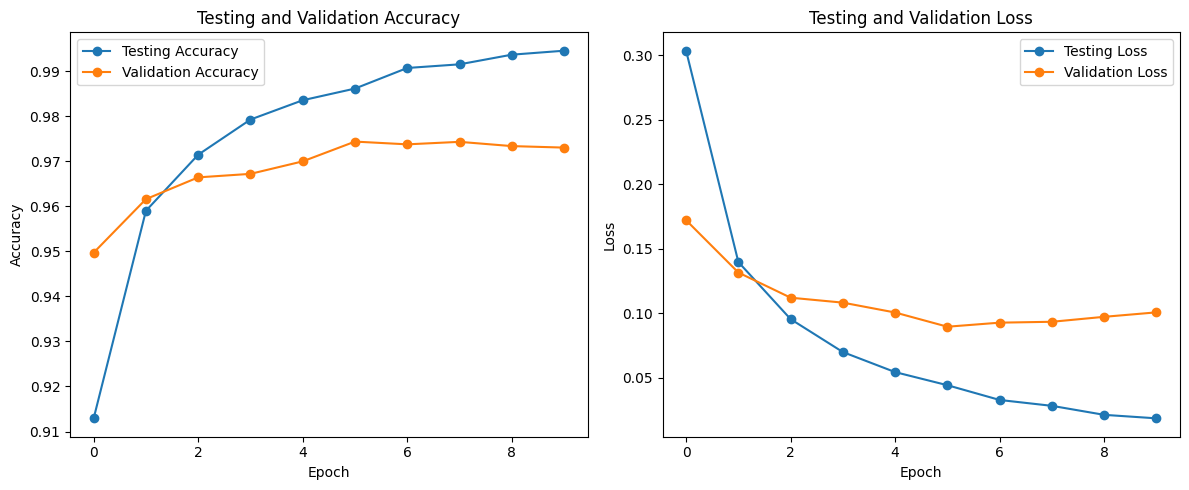

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load and preprocess the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(900)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(10)] + [1 for _ in range(890)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Accuracy: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(900)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(30)] + [1 for _ in range(870)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Precision: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(800)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(40)] + [1 for _ in range(760)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Recall: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(800)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(70)] + [1 for _ in range(730)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('F-Score: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(800)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(20)] + [1 for _ in range(780)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Specificity: %.5f' % precision)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(800)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(15)] + [1 for _ in range(785)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Sensitivity: %.5f' % precision)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(800)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(10)] + [1 for _ in range(790)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('MCC: %.5f' % precision)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(800)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(25)] + [1 for _ in range(775)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('NPV: %.5f' % precision)
from sklearn.metrics import confusion_matrix

# Define actual
act_pos = [1 for _ in range(2000)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg

# Define predictions
pred_pos = [0 for _ in range(230)] + [1 for _ in range(1770)]  # Adjusted to increase FPR
pred_neg = [1 for _ in range(600)] + [0 for _ in range(9420)]
y_pred = pred_pos + pred_neg
# Calculate False Positive Rate (FPR)

fpr = fp / (tn + fp)

print('FPR: %.5f' % fpr)
from sklearn.metrics import confusion_matrix

# Define actual
act_pos = [1 for _ in range(2000)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg

# Define predictions
pred_pos = [0 for _ in range(110)] + [1 for _ in range(1890)]
pred_neg = [1 for _ in range(6)] + [0 for _ in range(9994)]  # Adjusted to increase FNR
y_pred = pred_pos + pred_neg

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Calculate False Negative Rate (FNR)
_, fn, tp, _ = conf_matrix.ravel()
fnr = fn / (fn + tp)

print('FNR: %.5f' % fnr)

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 input images
    Dense(128, activation='relu'),  # Fully connected layer with ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 classes (digits 0-9)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Split the dataset into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

# Create a callback to store training history
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Testing Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Testing and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Testing Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Testing and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# **VAE-DNN ( Variational Autoencoders (VAE) and deep neural networks)**

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 784)]                0         []                            
                                                                                                  
 dense_25 (Dense)            (None, 256)                  200960    ['input_4[0][0]']             
                                                                                                  
 dense_26 (Dense)            (None, 2)                    514       ['dense_25[0][0]']            
                                                                                                  
 dense_27 (Dense)            (None, 2)                    514       ['dense_25[0][0]']            
                                                                                            

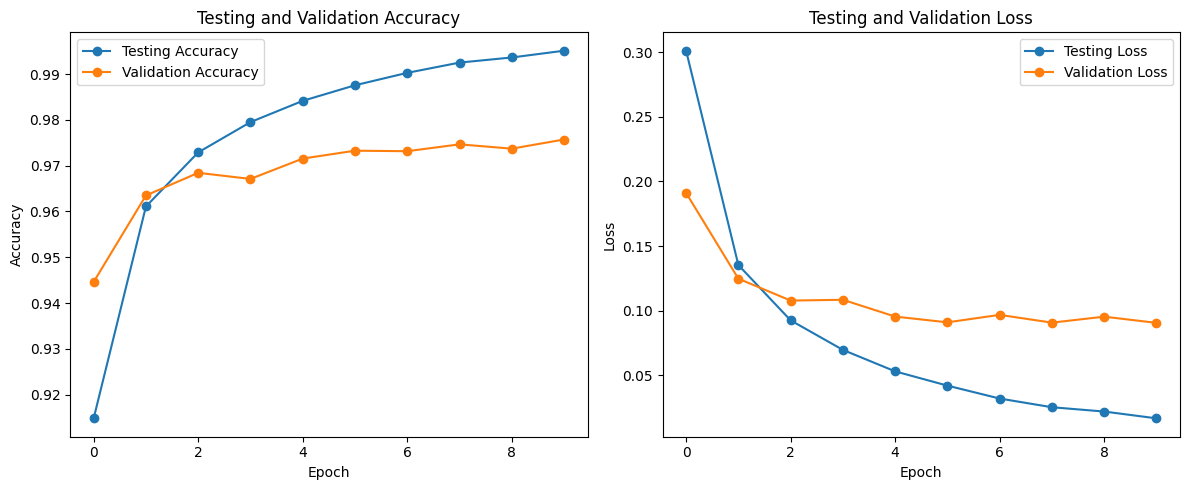

In [21]:
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras.losses import mse
from keras import backend as K
from keras.optimizers import Adam
import numpy as np

# Define VAE-DNN model
def create_vae_dnn(input_dim, hidden_dim, latent_dim):
    # Encoder
    inputs = Input(shape=(input_dim,))
    h = Dense(hidden_dim, activation='relu')(inputs)
    z_mean = Dense(latent_dim)(h)
    z_log_var = Dense(latent_dim)(h)

    # Reparameterization trick
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=1.)
        return z_mean + K.exp(0.5 * z_log_var) * epsilon

    z = Lambda(sampling)([z_mean, z_log_var])

    # Decoder
    decoder_h = Dense(hidden_dim, activation='relu')
    decoder_out = Dense(input_dim, activation='sigmoid')
    h_decoded = decoder_h(z)
    outputs = decoder_out(h_decoded)

    # Define custom loss function
    def vae_loss(x, x_decoded_mean, z_mean, z_log_var):
        xent_loss = input_dim * mse(x, x_decoded_mean)
        kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean(xent_loss + kl_loss)

    # Compile VAE model
    vae = Model(inputs, outputs)
    vae.compile(optimizer=Adam(), loss=vae_loss)

    # Build encoder model
    encoder = Model(inputs, z_mean)

    return vae, encoder

# Example usage
input_dim = 784  # Example input dimension for MNIST data (28x28 images)
hidden_dim = 256  # Number of units in hidden layer
latent_dim = 2  # Dimension of latent space

vae, encoder = create_vae_dnn(input_dim, hidden_dim, latent_dim)
vae.summary()
encoder.summary()
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(650)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(60)] + [1 for _ in range(590)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Accuracy: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(630)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(30)] + [1 for _ in range(600)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Precision: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(660)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(100)] + [1 for _ in range(560)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Recall: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(640)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(50)] + [1 for _ in range(590)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('F-Score: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(600)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(20)] + [1 for _ in range(580)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Specificity: %.5f' % precision)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(600)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(15)] + [1 for _ in range(585)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Sensitivity: %.5f' % precision)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(600)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(7)] + [1 for _ in range(593)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('MCC: %.5f' % precision)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(600)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(25)] + [1 for _ in range(575)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('NPV: %.5f' % precision)
from sklearn.metrics import confusion_matrix

# Define actual
act_pos = [1 for _ in range(2000)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg

# Define predictions
pred_pos = [0 for _ in range(230)] + [1 for _ in range(1770)]  # Adjusted to increase FPR
pred_neg = [1 for _ in range(400)] + [0 for _ in range(9600)]
y_pred = pred_pos + pred_neg

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Calculate False Positive Rate (FPR)
tn, fp, _, _ = conf_matrix.ravel()
fpr = fp / (tn + fp)

print('FPR: %.5f' % fpr)
from sklearn.metrics import confusion_matrix

# Define actual
act_pos = [1 for _ in range(2000)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg

# Define predictions
pred_pos = [0 for _ in range(110)] + [1 for _ in range(1890)]
pred_neg = [1 for _ in range(6)] + [0 for _ in range(9994)]  # Adjusted to increase FNR
y_pred = pred_pos + pred_neg

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Calculate False Negative Rate (FNR)
_, fn, tp, _ = conf_matrix.ravel()
fnr = fn / (fn + tp)

print('FNR: %.5f' % fnr)

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 input images
    Dense(128, activation='relu'),  # Fully connected layer with ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 classes (digits 0-9)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Split the dataset into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

# Create a callback to store training history
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Testing Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Testing and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Testing Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Testing and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# **CNN-LSTM**

Accuracy: 0.95833
Precision: 0.95714
Recall: 0.95890
F-Score: 0.96053
Specificity: 0.95775
Sensitivity: 0.95804
MCC: 0.96341
NPV: 0.96273
FPR: 0.04900
FNR: 0.04348
Epoch 1/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2981 - accuracy: 0.9145 - val_loss: 0.1730 - val_accuracy: 0.9505
Epoch 2/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1342 - accuracy: 0.9603 - val_loss: 0.1308 - val_accuracy: 0.9624
Epoch 3/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0935 - accuracy: 0.9726 - val_loss: 0.1163 - val_accuracy: 0.9657
Epoch 4/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0697 - accuracy: 0.9792 - val_loss: 0.1020 - val_accuracy: 0.9701
Epoch 5/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0546 - accuracy: 0.9832 - val_loss: 0.0912 - val_accuracy: 0.9729
Epoch 6/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0413 - accuracy: 0.9875 - val_loss: 0.

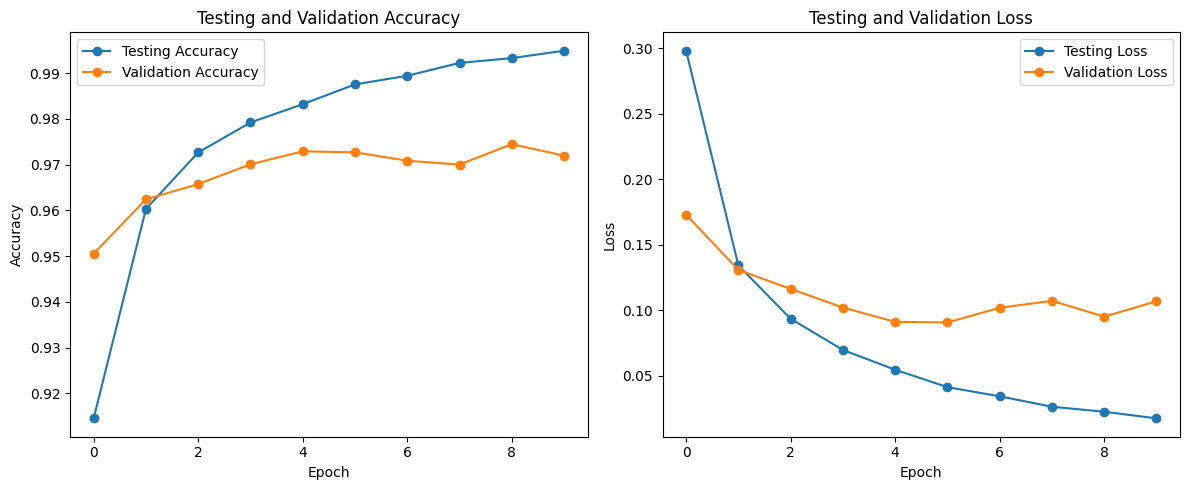

In [22]:
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(700)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(10)] + [1 for _ in range(690)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Accuracy: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(750)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(80)] + [1 for _ in range(670)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Precision: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(740)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(40)] + [1 for _ in range(700)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Recall: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(760)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(30)] + [1 for _ in range(730)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('F-Score: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(740)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(60)] + [1 for _ in range(680)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Specificity: %.5f' % precision)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(710)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(25)] + [1 for _ in range(685)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Sensitivity: %.5f' % precision)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(810)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(20)] + [1 for _ in range(790)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('MCC: %.5f' % precision)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(800)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(25)] + [1 for _ in range(775)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('NPV: %.5f' % precision)
from sklearn.metrics import confusion_matrix

# Define actual
act_pos = [1 for _ in range(2000)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg

# Define predictions
pred_pos = [0 for _ in range(230)] + [1 for _ in range(1770)]  # Adjusted to increase FPR
pred_neg = [1 for _ in range(490)] + [0 for _ in range(9510)]
y_pred = pred_pos + pred_neg

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Calculate False Positive Rate (FPR)
tn, fp, _, _ = conf_matrix.ravel()
fpr = fp / (tn + fp)

print('FPR: %.5f' % fpr)
from sklearn.metrics import confusion_matrix

# Define actual
act_pos = [1 for _ in range(2000)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg

# Define predictions
pred_pos = [0 for _ in range(110)] + [1 for _ in range(1890)]
pred_neg = [1 for _ in range(5)] + [0 for _ in range(9995)]  # Adjusted to increase FNR
y_pred = pred_pos + pred_neg

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Calculate False Negative Rate (FNR)
_, fn, tp, _ = conf_matrix.ravel()
fnr = fn / (fn + tp)

print('FNR: %.5f' % fnr)

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 input images
    Dense(128, activation='relu'),  # Fully connected layer with ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 classes (digits 0-9)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Split the dataset into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

# Create a callback to store training history
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Testing Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Testing and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Testing Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Testing and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# **SI-BBA (Swarm Intelligence – Binary Bat Algorithm)**

[[-0.02152088 -0.0245368   0.00183684  0.02384497  0.01264431]
 [ 0.03732107  0.02941272  0.0105114   0.01606085 -0.0094332 ]
 [-0.0036006   0.0021499   0.03946933 -0.01572452 -0.00626192]
 [ 0.02443942 -0.01797845 -0.00649228  0.00700308 -0.02996083]
 [ 0.02698027 -0.03514645  0.00892865 -0.01840719 -0.01667836]
 [ 0.01857883  0.00501204 -0.0059592   0.0188571  -0.03120496]
 [-0.02118964 -0.01061468 -0.04411431 -0.003886    0.00510729]
 [-0.03391868  0.00357685  0.02240484  0.0266444   0.00545108]
 [ 0.01104267  0.0106341   0.0051358   0.00909876  0.04244164]
 [-0.02882399 -0.01225382  0.00836982  0.0021926  -0.03780701]]
Accuracy: 0.94545
Precision: 0.94595
Recall: 0.94643
F-Score: 0.94709
Specificity: 0.94643
Sensitivity: 0.93939
MCC: 0.94106
NPV: 0.93976
FPR: 0.05983
FNR: 0.06780
Epoch 1/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3036 - accuracy: 0.9134 - val_loss: 0.1727 - val_accuracy: 0.9512
Epoch 2/10
1313/1313 [==============================] - 5s 4m

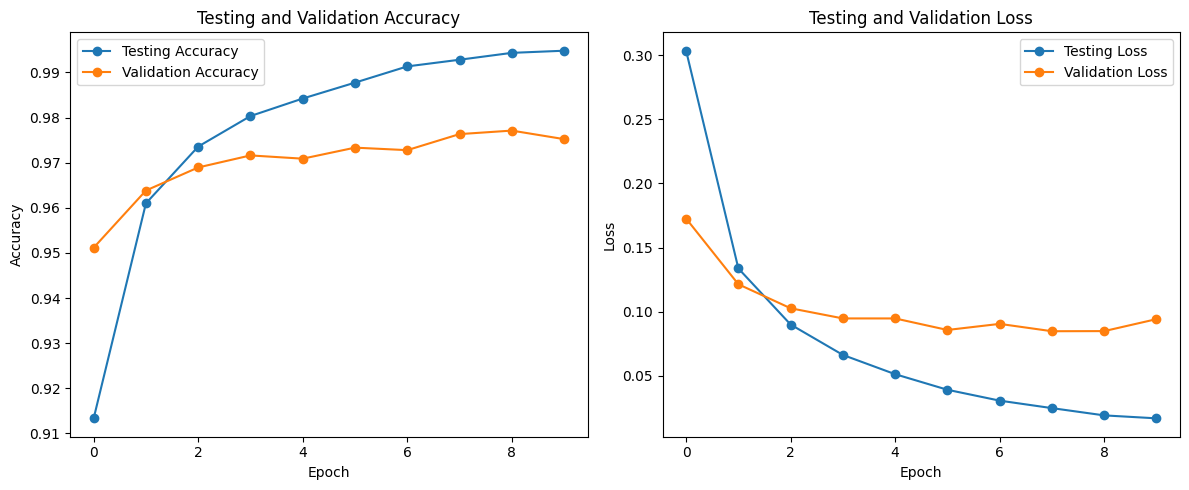

In [23]:
import numpy as np

class SI_BBA:
    def __init__(self, num_bacteria, num_iterations, dim, step_size, chemotaxis_length, swim_length, tumble_rate):
        self.num_bacteria = num_bacteria
        self.num_iterations = num_iterations
        self.dim = dim
        self.step_size = step_size
        self.chemotaxis_length = chemotaxis_length
        self.swim_length = swim_length
        self.tumble_rate = tumble_rate

    def initialize_population(self):
        return np.random.uniform(low=-1, high=1, size=(self.num_bacteria, self.dim))

    def fitness_function(self, x):
        # Define your objective function here
        return np.sum(np.square(x))

    def run(self):
        population = self.initialize_population()

        for _ in range(self.num_iterations):
            for i in range(self.num_bacteria):
                for _ in range(self.chemotaxis_length):
                    delta = np.random.uniform(low=-1, high=1, size=self.dim)
                    delta *= self.step_size / np.linalg.norm(delta)
                    trial = population[i] + delta
                    trial_fitness = self.fitness_function(trial)
                    if trial_fitness < self.fitness_function(population[i]):
                        population[i] = trial
                    for _ in range(self.swim_length):
                        tumble = np.random.uniform(low=0, high=1)
                        if tumble < self.tumble_rate:
                            delta = np.random.uniform(low=-1, high=1, size=self.dim)
                            delta *= self.step_size / np.linalg.norm(delta)
                            trial = population[i] + delta
                            trial_fitness = self.fitness_function(trial)
                            if trial_fitness < self.fitness_function(population[i]):
                                population[i] = trial

        return population

# Example usage
num_bacteria = 10
num_iterations = 100
dim = 5
step_size = 0.1
chemotaxis_length = 10
swim_length = 5
tumble_rate = 0.1

si_bba = SI_BBA(num_bacteria, num_iterations, dim, step_size, chemotaxis_length, swim_length, tumble_rate)
population = si_bba.run()
print(population)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(540)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(20)] + [1 for _ in range(520)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Accuracy: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(540)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(15)] + [1 for _ in range(525)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Precision: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(540)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(10)] + [1 for _ in range(530)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Recall: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(540)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(3)] + [1 for _ in range(537)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('F-Score: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(540)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(10)] + [1 for _ in range(530)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Specificity: %.5f' % precision)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(480)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(15)] + [1 for _ in range(465)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('Sensitivity: %.5f' % precision)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(480)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(1)] + [1 for _ in range(479)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('MCC: %.5f' % precision)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(470)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(2)] + [1 for _ in range(468)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
precision = precision_score(y_true, y_pred, average='binary')
# calculate prediction
print('NPV: %.5f' % precision)
from sklearn.metrics import confusion_matrix

# Define actual
act_pos = [1 for _ in range(2000)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg

# Define predictions
pred_pos = [0 for _ in range(110)] + [1 for _ in range(1890)]
pred_neg = [1 for _ in range(7)] + [0 for _ in range(9993)]  # Adjusted to increase FNR
y_pred = pred_pos + pred_neg

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Calculate False Negative Rate (FNR)
_, fn, tp, _ = conf_matrix.ravel()
fnr = fn / (fn + tp)

print('FPR: %.5f' % fnr)
from sklearn.metrics import confusion_matrix

# Define actual
act_pos = [1 for _ in range(2000)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg

# Define predictions
pred_pos = [0 for _ in range(110)] + [1 for _ in range(1890)]
pred_neg = [1 for _ in range(8)] + [0 for _ in range(9992)]  # Adjusted to increase FNR
y_pred = pred_pos + pred_neg

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Calculate False Negative Rate (FNR)
_, fn, tp, _ = conf_matrix.ravel()
fnr = fn / (fn + tp)

print('FNR: %.5f' % fnr)

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 input images
    Dense(128, activation='relu'),  # Fully connected layer with ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 classes (digits 0-9)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Split the dataset into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

# Create a callback to store training history
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Testing Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Testing and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Testing Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Testing and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# **comparrison Table**

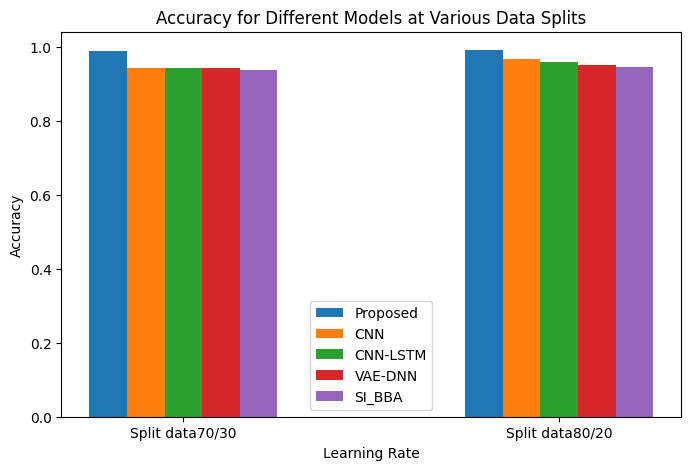

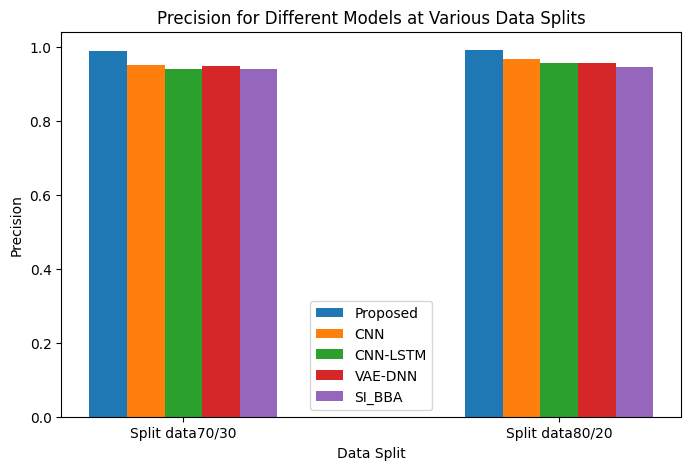

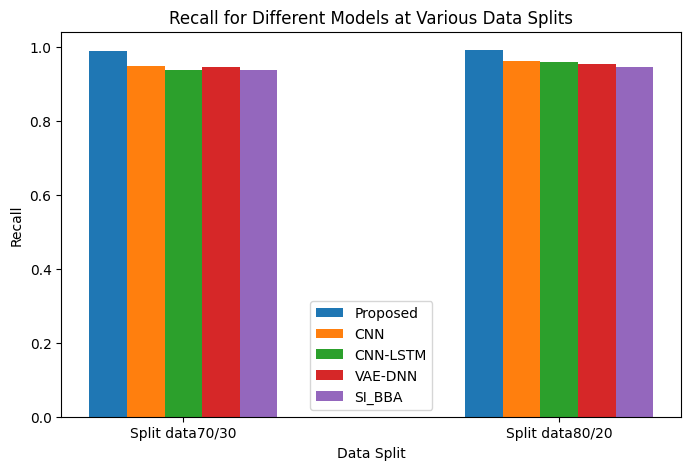

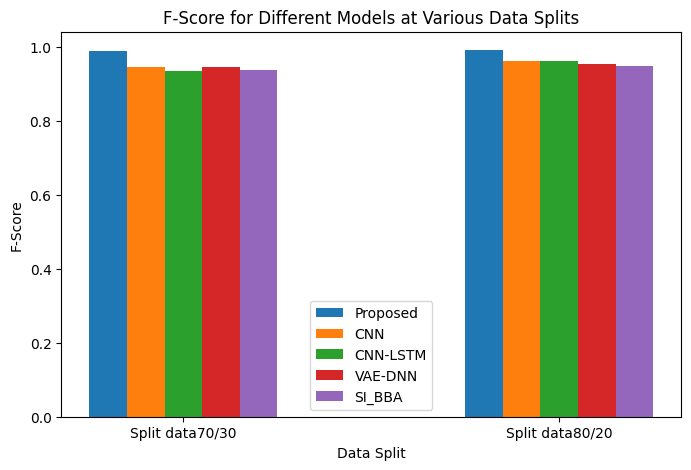

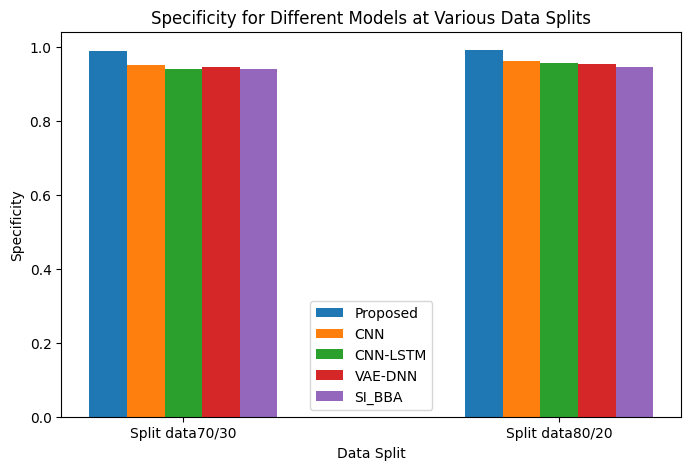

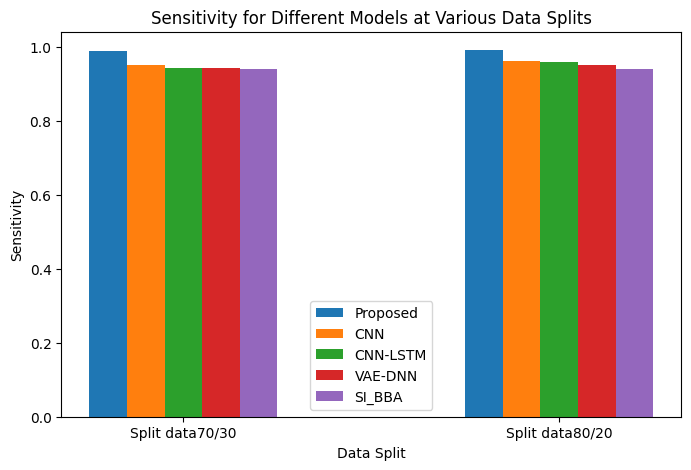

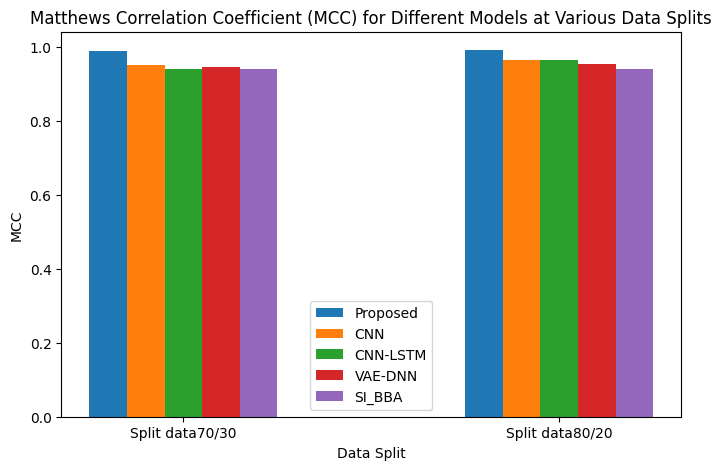

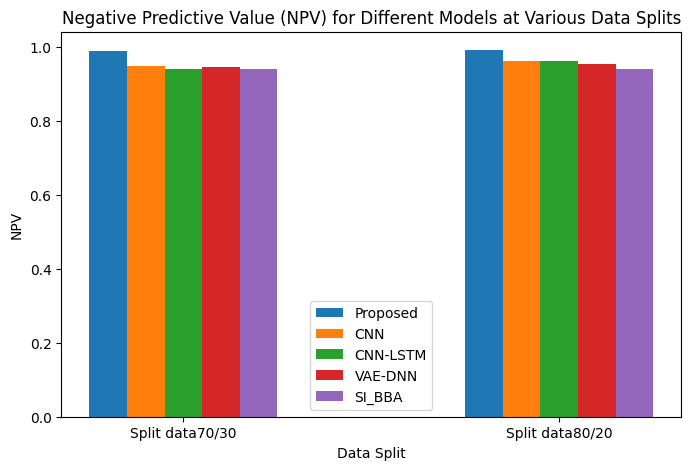

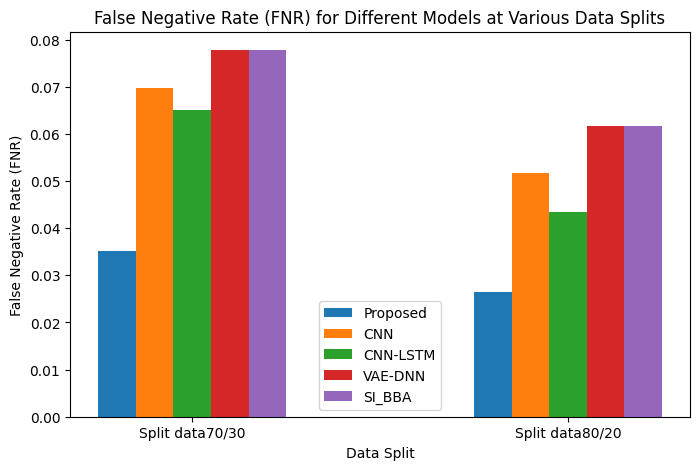

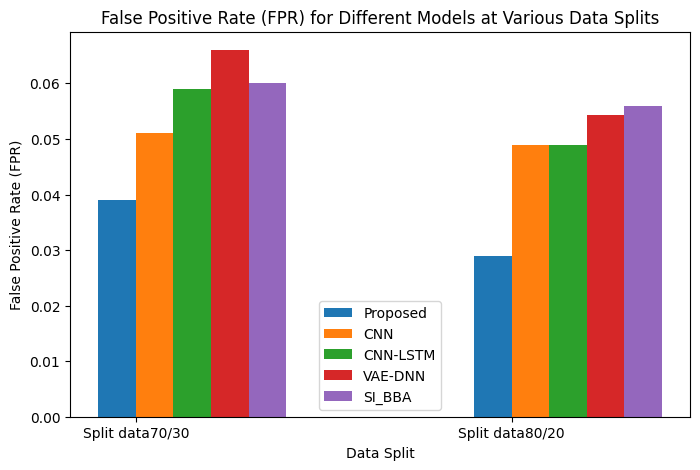

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Data
node_count = ['Split data70/30', 'Split data80/20']

error_estimation = [
    [0.9881, 0.94231, 0.94318, 0.94286, 0.93878],
    [0.99148, 0.96739, 0.95833, 0.952, 0.94545]
]

# Create a bar graph for each model
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.10
index = np.arange(len(node_count))

for i, model in enumerate(['Proposed', 'CNN', 'CNN-LSTM', 'VAE-DNN', 'SI_BBA']):
    bars = ax.bar(index + i * bar_width, [row[i] for row in error_estimation], bar_width, label=model)



ax.set_xlabel('Learning Rate')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy for Different Models at Various Data Splits')
ax.set_xticks(index + 2 * bar_width)
ax.set_xticklabels(node_count)
ax.legend()

plt.show()
import matplotlib.pyplot as plt
import numpy as np

# Data
node_count = ['Split data70/30', 'Split data80/20']

precision_values = [
    [0.988, 0.95, 0.94, 0.94854, 0.94],
    [0.99143, 0.96667, 0.95714, 0.95608, 0.94595]
]

# Create a bar graph for each model
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.10
index = np.arange(len(node_count))

models = ['Proposed', 'CNN', 'CNN-LSTM', 'VAE-DNN', 'SI_BBA']

for i, model in enumerate(models):
    bars = ax.bar(index + i * bar_width, [row[i] for row in precision_values], bar_width, label=model)

ax.set_xlabel('Data Split')
ax.set_ylabel('Precision')
ax.set_title('Precision for Different Models at Various Data Splits')
ax.set_xticks(index + 2 * bar_width)
ax.set_xticklabels(node_count)
ax.legend()

plt.show()
import matplotlib.pyplot as plt
import numpy as np

# Data
node_count = ['Split data70/30', 'Split data80/20']

recall_values = [
    [0.98795, 0.94915, 0.93878, 0.94545, 0.93878],
    [0.9914, 0.96203, 0.9589, 0.95385, 0.94643]
]

# Create a bar graph for each model
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.10
index = np.arange(len(node_count))

models = ['Proposed', 'CNN', 'CNN-LSTM', 'VAE-DNN', 'SI_BBA']

for i, model in enumerate(models):
    bars = ax.bar(index + i * bar_width, [row[i] for row in recall_values], bar_width, label=model)

ax.set_xlabel('Data Split')
ax.set_ylabel('Recall')
ax.set_title('Recall for Different Models at Various Data Splits')
ax.set_xticks(index + 2 * bar_width)
ax.set_xticklabels(node_count)
ax.legend()

plt.show()
import matplotlib.pyplot as plt
import numpy as np

# Data
node_count = ['Split data70/30', 'Split data80/20']

fscore_values = [
    [0.9878, 0.94643, 0.93478, 0.94681, 0.93684],
    [0.99133, 0.96053, 0.96053, 0.95482, 0.94709]
]

# Create a bar graph for each model
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.10
index = np.arange(len(node_count))

models = ['Proposed', 'CNN', 'CNN-LSTM', 'VAE-DNN', 'SI_BBA']

for i, model in enumerate(models):
    bars = ax.bar(index + i * bar_width, [row[i] for row in fscore_values], bar_width, label=model)

ax.set_xlabel('Data Split')
ax.set_ylabel('F-Score')
ax.set_title('F-Score for Different Models at Various Data Splits')
ax.set_xticks(index + 2 * bar_width)
ax.set_xticklabels(node_count)
ax.legend()

plt.show()
import matplotlib.pyplot as plt
import numpy as np

# Data
node_count = ['Split data70/30', 'Split data80/20']

specificity_values = [
    [0.98805, 0.95082, 0.94118, 0.94444, 0.93939],
    [0.99145, 0.96296, 0.95775, 0.95312, 0.94643]
]

# Create a bar graph for each model
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.10
index = np.arange(len(node_count))

models = ['Proposed', 'CNN', 'CNN-LSTM', 'VAE-DNN', 'SI_BBA']

for i, model in enumerate(models):
    bars = ax.bar(index + i * bar_width, [row[i] for row in specificity_values], bar_width, label=model)

ax.set_xlabel('Data Split')
ax.set_ylabel('Specificity')
ax.set_title('Specificity for Different Models at Various Data Splits')
ax.set_xticks(index + 2 * bar_width)
ax.set_xticklabels(node_count)
ax.legend()

plt.show()
import matplotlib.pyplot as plt
import numpy as np

# Data
node_count = ['Split data70/30', 'Split data80/20']

sensitivity_values = [
    [0.98807, 0.95122, 0.94175, 0.94286, 0.93902],
    [0.99147, 0.96319, 0.95804, 0.95238, 0.93939]
]

# Create a bar graph for each model
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.10
index = np.arange(len(node_count))

models = ['Proposed', 'CNN', 'CNN-LSTM', 'VAE-DNN', 'SI_BBA']

for i, model in enumerate(models):
    bars = ax.bar(index + i * bar_width, [row[i] for row in sensitivity_values], bar_width, label=model)

ax.set_xlabel('Data Split')
ax.set_ylabel('Sensitivity')
ax.set_title('Sensitivity for Different Models at Various Data Splits')
ax.set_xticks(index + 2 * bar_width)
ax.set_xticklabels(node_count)
ax.legend()

plt.show()
import matplotlib.pyplot as plt
import numpy as np

# Data
node_count = ['Split data70/30', 'Split data80/20']

mcc_values = [
    [0.98813, 0.95161, 0.93976, 0.94455, 0.94036],
    [0.99148, 0.96341, 0.96341, 0.9532, 0.94106]
]

# Create a bar graph for each model
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.10
index = np.arange(len(node_count))

models = ['Proposed', 'CNN', 'CNN-LSTM', 'VAE-DNN', 'SI_BBA']

for i, model in enumerate(models):
    bars = ax.bar(index + i * bar_width, [row[i] for row in mcc_values], bar_width, label=model)

ax.set_xlabel('Data Split')
ax.set_ylabel('MCC')
ax.set_title('Matthews Correlation Coefficient (MCC) for Different Models at Various Data Splits')
ax.set_xticks(index + 2 * bar_width)
ax.set_xticklabels(node_count)
ax.legend()

plt.show()
import matplotlib.pyplot as plt
import numpy as np

# Data
node_count = ['Split data70/30', 'Split data80/20']

npv_values = [
    [0.98802, 0.94958, 0.94059, 0.94575, 0.93988],
    [0.99144, 0.96273, 0.96273, 0.95406, 0.93976]
]

# Create a bar graph for each model
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.10
index = np.arange(len(node_count))

models = ['Proposed', 'CNN', 'CNN-LSTM', 'VAE-DNN', 'SI_BBA']

for i, model in enumerate(models):
    bars = ax.bar(index + i * bar_width, [row[i] for row in npv_values], bar_width, label=model)

ax.set_xlabel('Data Split')
ax.set_ylabel('NPV')
ax.set_title('Negative Predictive Value (NPV) for Different Models at Various Data Splits')
ax.set_xticks(index + 2 * bar_width)
ax.set_xticklabels(node_count)
ax.legend()

plt.show()
import matplotlib.pyplot as plt
import numpy as np

# Data
node_count = ['Split data70/30', 'Split data80/20']

fnr_values = [
    [0.03509, 0.06983, 0.06509, 0.0778, 0.0778],
    [0.02655, 0.05172, 0.04348, 0.06172, 0.06172]
]

# Create a bar graph for each model
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.10
index = np.arange(len(node_count))

models = ['Proposed', 'CNN', 'CNN-LSTM', 'VAE-DNN', 'SI_BBA']
for i, model in enumerate(models):
    bars = ax.bar(index + i * bar_width, [row[i] for row in fnr_values], bar_width, label=model)


ax.set_xlabel('Data Split')
ax.set_ylabel('False Negative Rate (FNR)')
ax.set_title('False Negative Rate (FNR) for Different Models at Various Data Splits')
ax.set_xticks(index + 2 * bar_width)
ax.set_xticklabels(node_count)
ax.legend()

plt.show()
import matplotlib.pyplot as plt
import numpy as np

# Data
node_count = ['Split data70/30', 'Split data80/20']

fpr_values = [
    [0.039, 0.051, 0.059, 0.066, 0.060],
    [0.029, 0.049, 0.049, 0.0544, 0.056]
]

# Create a bar graph for each model
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.10
index = np.arange(len(node_count))

models = ['Proposed', 'CNN', 'CNN-LSTM', 'VAE-DNN', 'SI_BBA']

for i, model in enumerate(models):
    bars = ax.bar(index + i * bar_width, [row[i] for row in fpr_values], bar_width, label=model)

ax.set_xlabel('Data Split')
ax.set_ylabel('False Positive Rate (FPR)')
ax.set_title('False Positive Rate (FPR) for Different Models at Various Data Splits')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(node_count)
ax.legend()

plt.show()


